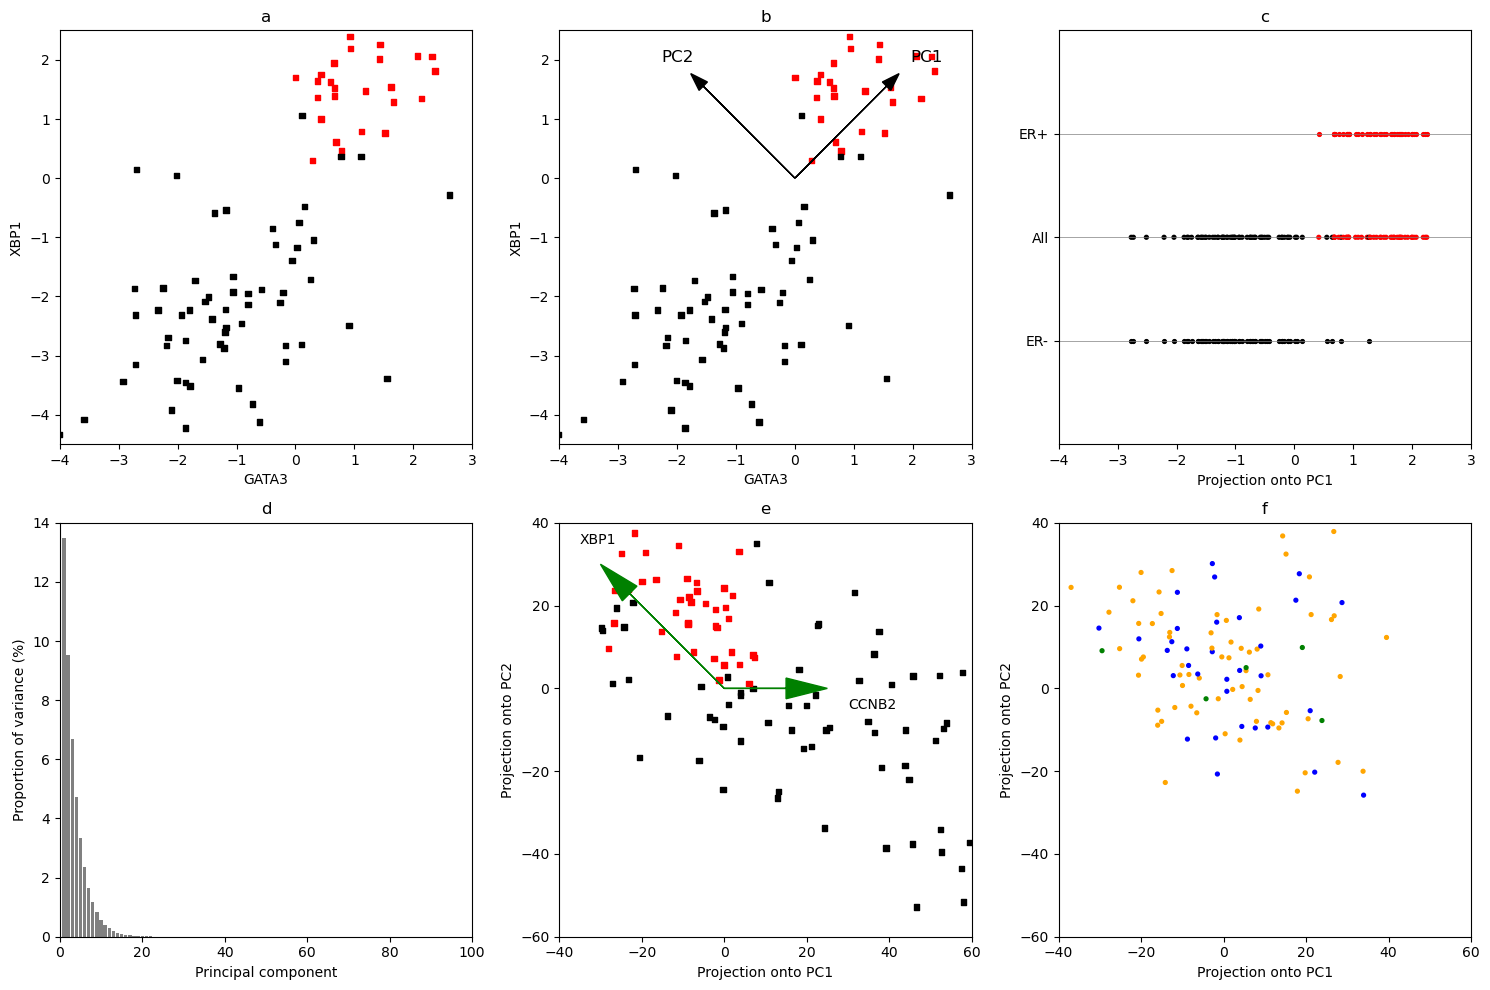

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
sample_count = 105

labels = np.array([0] * 63 + [1] * 42)
np.random.shuffle(labels)

gene1_expr = np.zeros(sample_count)
gene2_expr = np.zeros(sample_count)

for i in range(sample_count):
    if labels[i] == 1:
        gene1_expr[i] = np.random.normal(1.2, 0.7)
        gene2_expr[i] = np.random.normal(1.2, 0.7)
    else:
        gene1_expr[i] = np.random.normal(-1.0, 1.3)
        gene2_expr[i] = np.random.normal(-1.5, 1.2)

gene2_expr += 0.6 * gene1_expr + np.random.normal(0, 0.4, sample_count)

data_matrix = np.column_stack((gene1_expr, gene2_expr))
standardized_data = StandardScaler().fit_transform(data_matrix)

pca_model = PCA(n_components=2)
pc_data = pca_model.fit_transform(standardized_data)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# a
ax = axs[0, 0]
ax.scatter(data_matrix[:, 0], data_matrix[:, 1],
           c=['red' if val == 1 else 'black' for val in labels],
           marker='s', s=15)
ax.set(xlabel='GATA3', ylabel='XBP1', title='a')
ax.set_xlim(-4, 3)
ax.set_ylim(-4.5, 2.5)

# b
ax = axs[0, 1]
ax.scatter(data_matrix[:, 0], data_matrix[:, 1],
           c=['red' if val == 1 else 'black' for val in labels],
           marker='s', s=15)

vectors = pca_model.components_
if vectors[0, 0] < 0:
    vectors[0] = -vectors[0]
if vectors[1, 1] < 0:
    vectors[1] = -vectors[1]

arrow_scale = 2.5
for i, label in enumerate(['PC1', 'PC2']):
    dx, dy = vectors[i]
    ax.arrow(0, 0, arrow_scale * dx, arrow_scale * dy,
             head_width=0.2, head_length=0.3, fc='black', ec='black', length_includes_head=True)
    offset = 0.2 if label == 'PC1' else -0.5
    ax.text(arrow_scale * dx + offset, arrow_scale * dy + 0.2, label, fontsize=12)

ax.set(xlabel='GATA3', ylabel='XBP1', title='b')
ax.set_xlim(-4, 3)
ax.set_ylim(-4.5, 2.5)

# c
ax = axs[0, 2]
proj_y_pos = {'All': 0, 'ER-': -0.5, 'ER+': 0.5}
ax.axhline(proj_y_pos['All'], color='gray', lw=0.5)
ax.axhline(proj_y_pos['ER-'], color='gray', lw=0.5)
ax.axhline(proj_y_pos['ER+'], color='gray', lw=0.5)

ax.scatter(pc_data[:, 0], [proj_y_pos['All']] * sample_count,
           c=['red' if val == 1 else 'black' for val in labels], marker='.', s=30)
ax.scatter(pc_data[labels == 0, 0], [proj_y_pos['ER-']] * np.sum(labels == 0), c='black', marker='.', s=30)
ax.scatter(pc_data[labels == 1, 0], [proj_y_pos['ER+']] * np.sum(labels == 1), c='red', marker='.', s=30)

ax.set(xlabel='Projection onto PC1', yticks=list(proj_y_pos.values()), yticklabels=list(proj_y_pos.keys()), title='c')
ax.set_xlim(-4, 3)
ax.set_ylim(-1, 1)

# d
ax = axs[1, 0]
n_pcs = 100
explained = np.zeros(n_pcs)
explained[0] = 13.5
for i in range(1, n_pcs):
    explained[i] = 13.5 * np.exp(-0.35 * i)

ax.bar(range(1, n_pcs + 1), explained, color='gray', width=0.8)
ax.set(xlabel='Principal component', ylabel='Proportion of variance (%)', title='d')
ax.set_ylim(0, 14)
ax.set_xlim(0, 100)

# e
ax = axs[1, 1]
x_range = (-40, 60)
y_range = (-60, 40)
pc1_points = np.zeros(sample_count)
pc2_points = np.zeros(sample_count)

for i in range(sample_count):
    if labels[i] == 1:
        pc1_points[i] = np.random.uniform(-30, 10)
        pc2_points[i] = -0.8 * pc1_points[i] + np.random.normal(15, 8)
    else:
        pc1_points[i] = np.random.uniform(-30, 60)
        pc2_points[i] = -0.4 * pc1_points[i] + np.random.normal(0, 15)

ax.scatter(pc1_points, pc2_points,
           c=['red' if val == 1 else 'black' for val in labels],
           marker='s', s=15)

xbp1_vec = (-30, 30)
ccnb2_vec = (25, 0)

ax.arrow(0, 0, *xbp1_vec, head_width=5, head_length=10, fc='green', ec='green', length_includes_head=True)
ax.arrow(0, 0, *ccnb2_vec, head_width=5, head_length=10, fc='green', ec='green', length_includes_head=True)
ax.text(xbp1_vec[0] - 5, xbp1_vec[1] + 5, "XBP1", fontsize=10)
ax.text(ccnb2_vec[0] + 5, ccnb2_vec[1] - 5, "CCNB2", fontsize=10)

ax.set(xlabel='Projection onto PC1', ylabel='Projection onto PC2', title='e')
ax.set_xlim(x_range)
ax.set_ylim(y_range)

# f
ax = axs[1, 2]
group_sizes = [68, 32, 5]
group_labels = np.array([0] * group_sizes[0] + [1] * group_sizes[1] + [2] * group_sizes[2])
np.random.shuffle(group_labels)

group_colors = ['orange', 'blue', 'green']
colored = [group_colors[g] for g in group_labels]

pc1_final = np.random.uniform(*x_range, sample_count)
pc2_final = np.random.uniform(*y_range, sample_count)

pc1_final[:group_sizes[0]] = np.random.normal(5, 15, group_sizes[0])
pc2_final[:group_sizes[0]] = np.random.normal(0, 15, group_sizes[0])
pc1_final[group_sizes[0]:sum(group_sizes[:2])] = np.random.normal(-15, 10, group_sizes[1])
pc2_final[group_sizes[0]:sum(group_sizes[:2])] = np.random.normal(10, 10, group_sizes[1])
pc1_final[-group_sizes[2]:] = np.random.normal(30, 5, group_sizes[2])
pc2_final[-group_sizes[2]:] = np.random.normal(-20, 5, group_sizes[2])

ax.scatter(pc1_final, pc2_final, c=colored, marker='.', s=30)
ax.set(xlabel='Projection onto PC1', ylabel='Projection onto PC2', title='f')
ax.set_xlim(x_range)
ax.set_ylim(y_range)

plt.tight_layout()
plt.savefig('pca_visualization_output.png', dpi=300)
plt.show()
